In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import time
import ast


import sys
sys.path.insert(1, '../../Files')

import logo
from constants import Units, Constants
from SNdistribution import SNdistribution

import pandas as pd

import plotly.graph_objects as go

In [2]:
%load_ext autoreload
%autoreload 2

Check if everything is ok

In [3]:
logo.logo()


      ____  _   _   _____          _                 _\/_
     / ___|| \ | | |  ___|_ _  ___| |_ ___  _ __ _   _/\ 
     \___ \|  \| | | |_ / _` |/ __| __/ _ \| '__| | | |
      ___) | |\  | |  _| (_| | (__| || (_) | |  | |_| |
     |____/|_| \_| |_|  \__,_|\___|\__\___/|_|   \__, |
                                                 |___/ 
                                            
                Baking particles since 1987!
                         v.beta.1
    


# Simulate SN in the galaxy

In [4]:
SNdist = SNdistribution(SNrate=1.63, 
                        Rd=2.6, 
                        H=0.3, 
                        RE=8.23, 
                        zE=0.0208)

### Simulate the SN history (r, theta, z, t)

##### Estimate the SN relevant time window

In [5]:
# ALPs that take longer to reach Earth: minimum energy and maximum distance
print('max time (SN at r=-30 kpc, and very slow ALPs: Ea~ma):')
print( 't = %.6e' % SNdist.tarrival(0.01*(1 + 0.01), 0.01, -30, 0, 0) , 's' ) # inputs: (Ea, ma, r, theta, z)
print( 't = %.6e' % SNdist.tarrival(1*(1 + 0.01), 1, -30, 0, 0) , 's' )
print( 't = %.6e' % SNdist.tarrival(10*(1 + 0.01), 10, -30, 0, 0) , 's' )
print( 't = %.6e' % SNdist.tarrival(100*(1 + 0.01), 100, -30, 0, 0) , 's' )

RE=8.23
zE=0.0208
# ALPs that take longer to reach Earth: minimum energy and maximum distance
print()
print('min time (SN at r=RE+0.1 kpc, and very fast ALPs: Ea>>ma)')
print( 't = %.6e' % SNdist.tarrival(150, 0.01, RE + 0.1, 0, zE) , 's' )
print( 't = %.6e' % SNdist.tarrival(150, 1, RE + 0.1, 0, zE) , 's' )
print( 't = %.6e' % SNdist.tarrival(150, 10, RE + 0.1, 0, zE) , 's' )
print( 't = %.6e' % SNdist.tarrival(150, 100, RE + 0.1, 0, zE) , 's' )

max time (SN at r=-30 kpc, and very slow ALPs: Ea~ma):
t = 2.803515e+13 s
t = 2.803515e+13 s
t = 2.803515e+13 s
t = 2.803515e+13 s

min time (SN at r=RE+0.1 kpc, and very fast ALPs: Ea>>ma)
t = 1.029379e+10 s
t = 1.029402e+10 s
t = 1.031674e+10 s
t = 1.381057e+10 s


In [6]:
RE=8.23
zE=0.0208
# ALPs that take longer to reach Earth: minimum energy and maximum distance
print()
print('min time (SN at r=RE+0.1 kpc, and very fast ALPs: Ea>>ma)')
print( 't = %.6e' % SNdist.tarrival(150, 0.01, RE + 0.00, 0, zE) , 's' )
print( 't = %.6e' % SNdist.tarrival(150, 1, RE + 0.00, 0, zE) , 's' )
print( 't = %.6e' % SNdist.tarrival(150, 10, RE + 0.00, 0, zE) , 's' )
print( 't = %.6e' % SNdist.tarrival(150, 100, RE + 0.00, 0, zE) , 's' )


min time (SN at r=RE+0.1 kpc, and very fast ALPs: Ea>>ma)
t = 0.000000e+00 s
t = 0.000000e+00 s
t = 0.000000e+00 s
t = 0.000000e+00 s


## Simulate

In [7]:
# number of universes:
num_ITER = 20
# num_ITER = 100

SN_numbers, SN_sim = SNdist.SNsimulation(num_ITER = num_ITER, time_low = -2.8e13, time_up = -1e10)
# SN_numbers, SN_sim = SNdist.SNsimulation(num_ITER = num_ITER, time_low = -2.8e13, time_up = 0)


# show the number of SN per universe
iteration = np.arange(1, num_ITER + 1)

print(" Universe |  # of SNe")
for i, count in zip(iteration, SN_numbers):
    print(f"{i:>9} | {count:>8}")

 Universe |  # of SNe
        1 |    14366
        2 |    14349
        3 |    14344
        4 |    14466
        5 |    14475
        6 |    14357
        7 |    14411
        8 |    14555
        9 |    14443
       10 |    14321
       11 |    14297
       12 |    14494
       13 |    14620
       14 |    14541
       15 |    14503
       16 |    14552
       17 |    14223
       18 |    14489
       19 |    14285
       20 |    14460


In [8]:
# Create DataFrame with a single simulation
df = pd.DataFrame(SN_sim[2], columns=['r [kpc]', '$\theta$', 'z [kpc]', 't [s]'])

# Show the first 10 rows
df.head(10)

,r [kpc],$\theta$,z [kpc],t [s]
0,3.633596,4.739676,-0.379220,-2.799916e+13
1,0.202749,0.202460,0.079171,-2.799898e+13
2,1.251226,5.475244,-0.320001,-2.799847e+13
3,1.684112,2.802380,-0.001709,-2.799619e+13
4,5.361244,4.173745,0.447933,-2.799555e+13
5,2.562183,1.889712,-0.326796,-2.799503e+13
6,2.177280,0.077653,0.087030,-2.799428e+13
7,1.914182,5.419587,0.137702,-2.799352e+13
8,8.099642,3.558192,0.138277,-2.799329e+13
9,3.172521,1.907403,-0.527523,-2.799244e+13


#### Plot the SN in the galactic coordinates

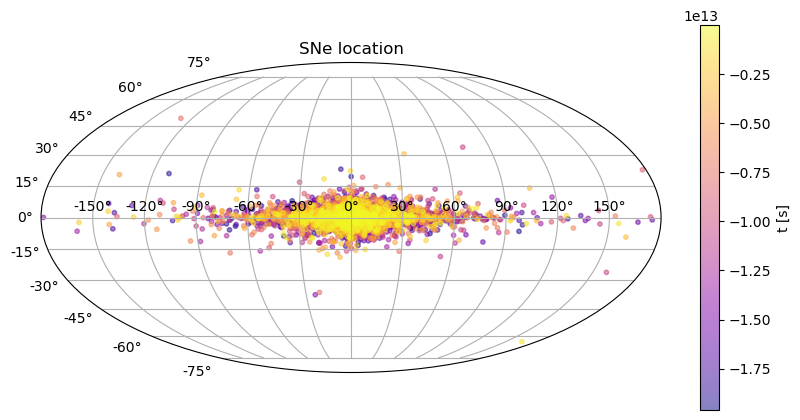

In [12]:
solar_system_position = np.array([8.3 , 0, 0])  # Position of the Solar System [kpc]

# number off SN to plot
num_sn_examples = 10000

# take SN positions from df (r, theta, z) 'r [kpc]', '$\theta$', 'z [kpc]', 't [s]'
r = df['r [kpc]'].values[-num_sn_examples:]
theta = df['$\theta$'].values[-num_sn_examples:]
z = df['z [kpc]'].values[-num_sn_examples:]

# Catesian
x = r * np.cos(theta)
y = r * np.sin(theta)

# Center in the Sun
x_helio = x - (solar_system_position[0] * np.cos(solar_system_position[1]) )
y_helio = y - (solar_system_position[0] * np.sin(solar_system_position[1]) )
z_helio = z - solar_system_position[2]

# now the GC is in (x_helio, y_helio) = (-r_sun, 0)
# I want it in (r_sun, 0)

# Mirror
x_new = -x_helio
y_new = y_helio
z_new = z_helio

# Galactic coordinates
l = np.arctan2(y_new, x_new)      # longitude [-pi, pi]
b = np.arctan2(z_new, np.sqrt(x_new**2 + y_new**2))  # latitude


# Plot in Mollweide projection (galactic coordinates)
plt.figure(figsize=(10, 5))
ax = plt.subplot(111, projection="mollweide")
sc = ax.scatter(l, b, s=10, c=df['t [s]'][-num_sn_examples:], cmap='plasma', alpha=0.5)


# Colorbar for SN times
cbar = plt.colorbar(sc, orientation="vertical", pad=0.05)
cbar.set_label("t [s]")

ax.set_title("SNe location")
ax.grid(True)
plt.savefig("figures/SNlocation.pdf", bbox_inches='tight')
plt.show()

## Diffuse approximation

In [17]:
# FLUX

diffSNfactor = SNdist.flux_factor()
print("Diffuse galactic SN flux factor: ", diffSNfactor, " [cm^{-2} s^{-1}]")

Diffuse galactic SN flux factor:  1.3955222568980171e-55  [cm^{-2} s^{-1}]


In [18]:
# FLUENCE

ExpTIME = 20 * Units.seconds_in_year  # Time window of the experiment, in seconds

fluence_diff = diffSNfactor * ExpTIME # [cm^{-2}]
print(f'Diffuse fluence factor (for 20 yr exposure): {fluence_diff:.3e} cm^-2')

Diffuse fluence factor (for 20 yr exposure): 8.802e-47 cm^-2


## Stochastic fluence

#### Compute the ALP flux from EACH SN in 1 simulation

In [37]:
# Example for 1 iteration

iit = 0 # choose a specific interaction
maTEST = 30 # MeV



# Generate Erange for the selected iteration
Erange = SNdist.Eflux1sim(maTEST, ExpTIME, SN_sim[iit])



# Create DataFrame with a single simulation
Erange_df = pd.DataFrame(Erange, columns=['E1 [MeV]', 'E2 [MeV]', 'd(SN-Earth) [kpc]'])

# Show the first and the last 5 rows
pd.concat([Erange_df.head(5), Erange_df.tail(5)])

/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/SNdistribution.py:115: RuntimeWarning: invalid value encountered in sqrt
  return np.max([ 0, np.real( ma / np.sqrt( 1 - ( (self.dSNearth(r,theta,z) * self.kpctocm * 1e-2) / (self.cms*ta) )**2) ) ])


,E1 [MeV],E2 [MeV],d(SN-Earth) [kpc]
0,30.009724,30.009725,6.924251
1,30.016850,30.016851,9.111799
2,30.014410,30.014411,8.426272
3,30.010482,30.010482,7.186689
4,30.028976,30.028977,11.940593
14361,NaN,NaN,9.002593
14362,NaN,NaN,11.658623
14363,NaN,NaN,7.463817
14364,NaN,NaN,11.072778
14365,NaN,NaN,7.769522


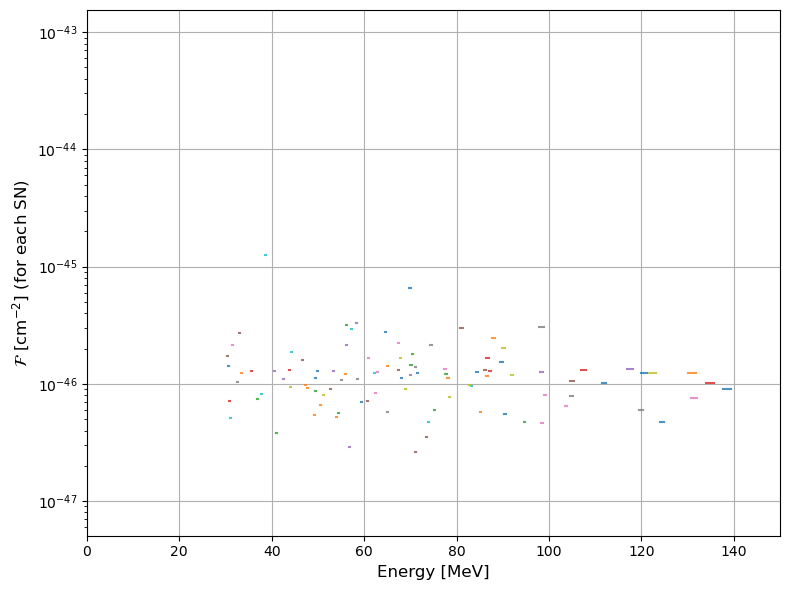

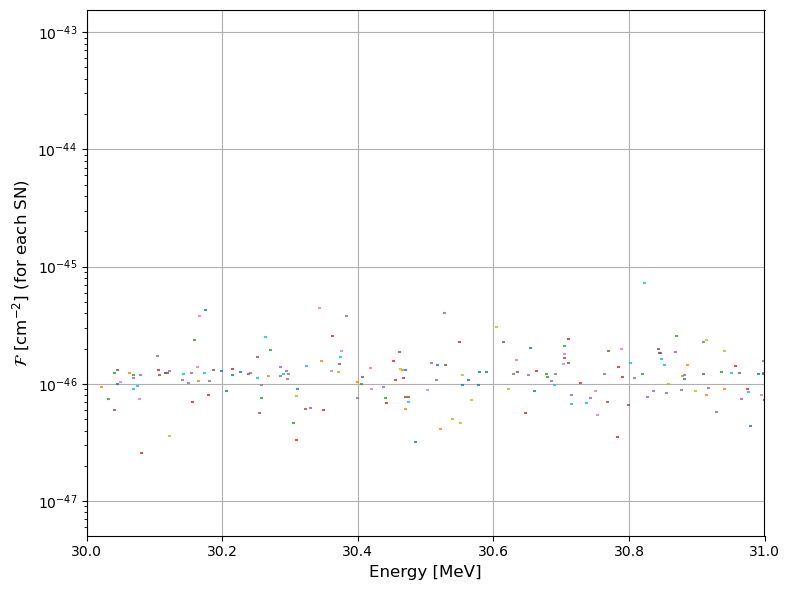

In [38]:
########
# PLOT #
# Example for 1 iteration and a fixed Mass #
########


# plot the contribution of each SN
plt.figure(figsize=(8, 6))

for E1, E2, dSN in Erange:
    if E2 > E1:
        Ea_vals = np.linspace(E1, E2, 2) 
        factor = 1 / (4 * np.pi * (dSN * Units.kpctocm)**2)  # cm^-2
        plt.plot(Ea_vals, [factor]*len(Ea_vals), alpha=0.8)

plt.xlim([0,150])
# plt.xlim([0,40])
plt.yscale('log')
plt.xlabel("Energy [MeV]", fontsize=12)
plt.ylabel(r"$\mathcal{F}$ [$\mathrm{cm^{-2}}$] (for each SN)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


# zoom
plt.figure(figsize=(8, 6))

for E1, E2, dSN in Erange:
    if E2 > E1:
        Ea_vals = np.linspace(E1, E2, 2) 
        factor = 1 / (4 * np.pi * (dSN * Units.kpctocm)**2)  # cm^-2
        plt.plot(Ea_vals, [factor]*len(Ea_vals), alpha=0.8)

plt.xlim([maTEST,maTEST+1])
plt.yscale('log')
plt.xlabel("Energy [MeV]", fontsize=12)
plt.ylabel(r"$\mathcal{F}$ [$\mathrm{cm^{-2}}$] (for each SN)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### Bin the fluence

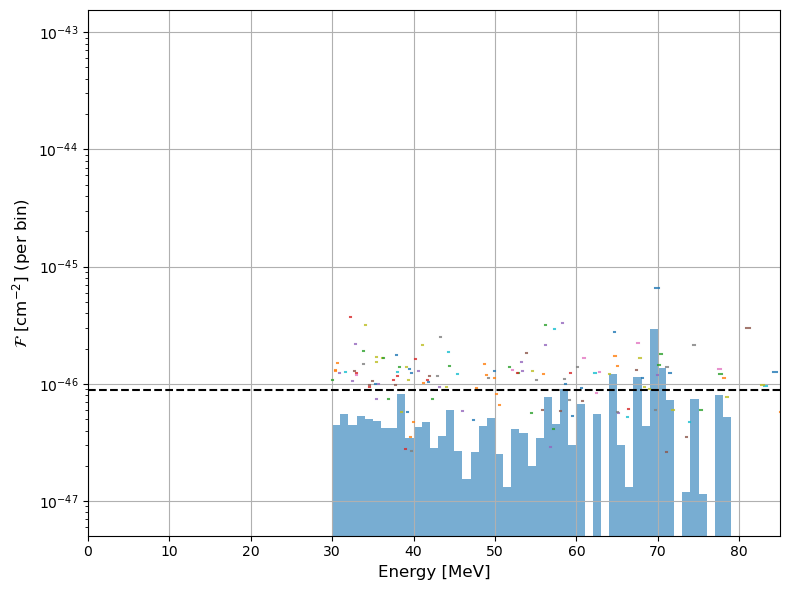

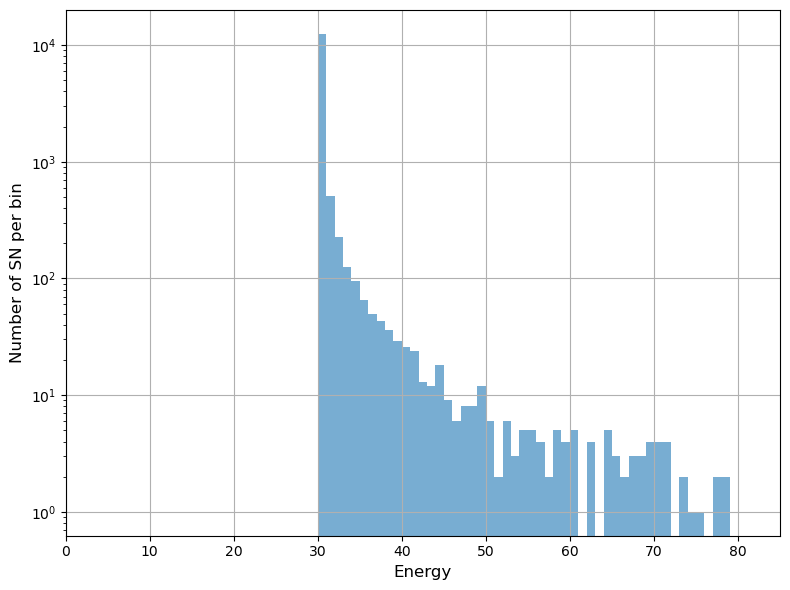

In [39]:
# plot the factor per bin (integrating each SN contribution)
# Ebins = np.linspace(15, 80, 66)
binwidth = 1
Ebins = np.arange(0, 80, binwidth)
bin_centers = 0.5 * (Ebins[:-1] + Ebins[1:])

result_bins, SN_num_bins, SN_indices_bins = SNdist.factor1simBINS(Erange, Ebins)

plt.figure(figsize=(8, 6))

for E1, E2, dSN in Erange:
    if E2 > E1:
        Ea_vals = np.linspace(E1, E2, 2) 
        factor = 1 / (4 * np.pi * (dSN * Units.kpctocm)**2)  # cm^-2
        plt.plot(Ea_vals, [factor]*len(Ea_vals), alpha=0.8)
        
plt.bar(bin_centers, result_bins, width=np.diff(Ebins), align='center', alpha=0.6)
plt.axhline(y=fluence_diff*binwidth, color='black', linestyle='--', label="Approximation")

plt.xlim([0,85])
plt.yscale('log')
plt.xlabel("Energy [MeV]", fontsize=12)
plt.ylabel(r"$\mathcal{F}$ [$\mathrm{cm^{-2}}$] (per bin)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


# number of SN per bin (each SN can contribute to more than 1 bin)
plt.figure(figsize=(8, 6))

plt.bar(bin_centers, SN_num_bins, width=np.diff(Ebins), align='center', alpha=0.6)

plt.xlim([0,85])
plt.yscale('log')
plt.xlabel("Energy", fontsize=12)
plt.ylabel("Number of SN per bin", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

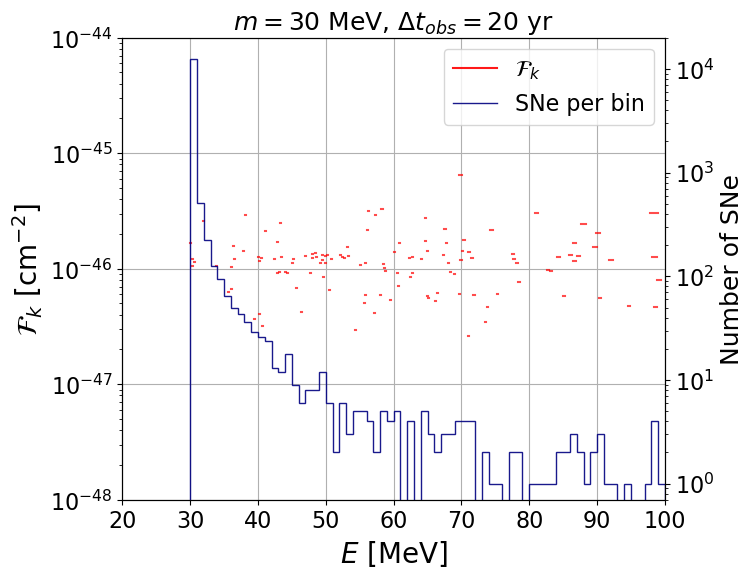

In [44]:
# plot the factor per bin (integrating each SN contribution)
# Ebins = np.linspace(15, 80, 66)
binwidth = 1
Ebins = np.arange(0, 150, binwidth)
bin_centers = 0.5 * (Ebins[:-1] + Ebins[1:])

result_bins, SN_num_bins, SN_indices_bins = SNdist.factor1simBINS(Erange, Ebins)


fig, ax1 = plt.subplots(figsize=(7,  6))


# A. Plot LEFT axis: the contribution of each SN
for E1, E2, dSN in Erange:
    if E2 > E1:
        Ea_vals = np.linspace(E1, E2, 2)
        factor = 1 / (4 * np.pi * (dSN * Units.kpctocm)**2) # cm^-2
        ax1.plot(Ea_vals, [factor]*len(Ea_vals), alpha=0.7, color='red', linestyle='-', rasterized=True)

ax1.set_xlim([20, 100])
ax1.set_ylim([1e-48,1e-44])
ax1.set_yscale('log')
ax1.set_xlabel(r"$E$ [MeV]", fontsize=20)
ax1.set_ylabel(r"$\mathcal{F}_{k}$ [$\mathrm{cm^{-2}}$]", fontsize=20)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.grid(True)


# A. Plot RIGHT axis: number of SN per bin
ax2 = ax1.twinx()

# dummy
ax2.plot(np.array([10000, 10010]), np.array([1000, 1010]), alpha=0.9, color='red', linestyle='-', label=r"$\mathcal{F}_{k}$")
# histogram
ax2.stairs(SN_num_bins, edges=Ebins, fill=False, color='navy', linewidth=1, alpha=0.9, label='SNe per bin') 

ax2.set_yscale('log')
ax2.set_ylabel("Number of SNe", fontsize=18)
ax2.tick_params(axis='y', labelsize=16)
ax2.set_ylim([0.7, 2e4])



plt.title(r"$m=30$ MeV, $\Delta t_{obs}=20$ yr", fontsize=18)
plt.legend(fontsize=16, loc='upper right')
plt.savefig("figures/sto1.pdf", bbox_inches='tight', dpi=3000)
plt.show()

### Mean of all simulations

/home/andres/CompuTools/Programas/SNfactory/v-beta-1/Projects/SGaSNoF/../../Files/SNdistribution.py:115: RuntimeWarning: invalid value encountered in sqrt
  return np.max([ 0, np.real( ma / np.sqrt( 1 - ( (self.dSNearth(r,theta,z) * self.kpctocm * 1e-2) / (self.cms*ta) )**2) ) ])


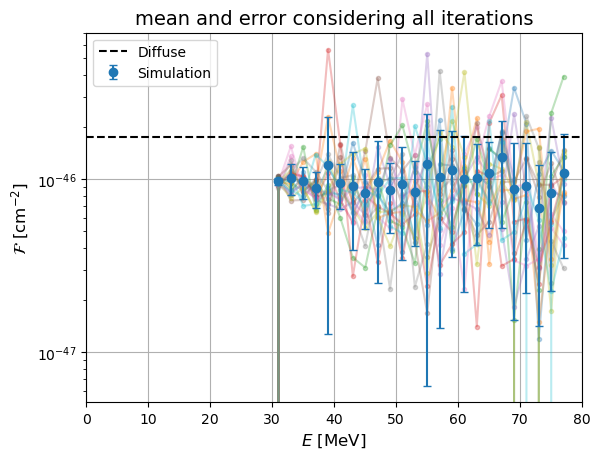

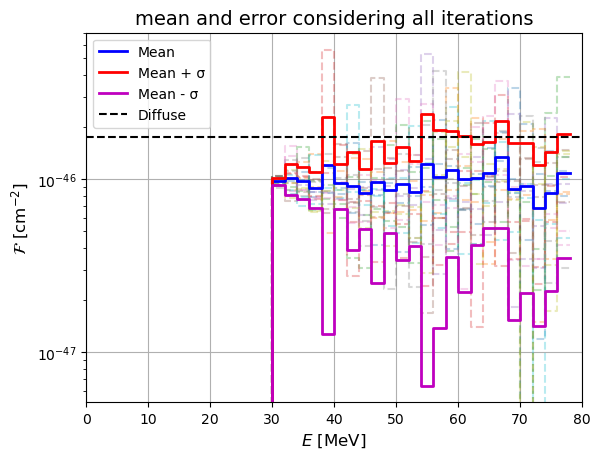

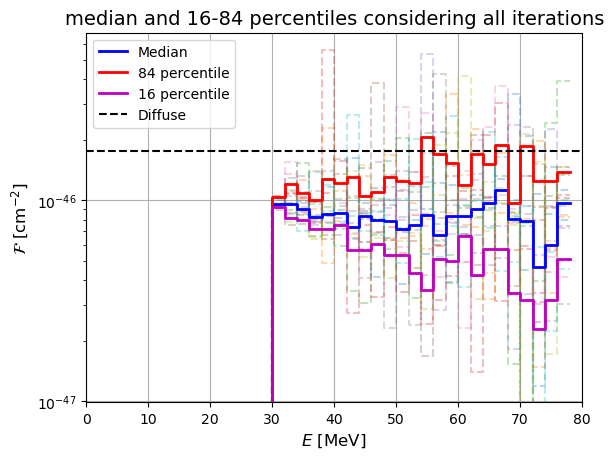

In [45]:

binwidth = 2
Ebins = np.arange(0, 78 + binwidth, binwidth)
bin_centers = 0.5 * (Ebins[:-1] + Ebins[1:])

mean_flux, std_flux, all_flux = SNdist.factorALLsimBINS(maTEST, ExpTIME, SN_sim, Ebins)



# plot each simulation
for sim in range(len(all_flux)):
    plt.plot(bin_centers, all_flux[sim], '.-', alpha=0.3)

# plot mean
plt.errorbar(bin_centers, mean_flux, yerr=std_flux, fmt='o', capsize=3, label = 'Simulation')
plt.axhline(y=fluence_diff*binwidth, color='black', linestyle='--', label="Diffuse")

plt.xlim(0,80)
# plt.ylim(1e-48,1e-45)
plt.yscale('log')
plt.xlabel("$E$ [MeV]", fontsize=12)
plt.ylabel(r"$\mathcal{F}$ [$\mathrm{cm^{-2}}$]", fontsize=12)
plt.title("mean and error considering all iterations", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()




# TO PLOT AS BINNED DATA

Ebins_edges = np.repeat(Ebins, 2)[1:-1]

# plot each simulation
for sim in range(len(all_flux)):
    all_flux_sim_edges = np.repeat(all_flux[sim], 2)
    plt.plot(Ebins_edges, all_flux_sim_edges, '--', alpha=0.3)

    
# plot mean
means_int_edges = np.repeat(mean_flux, 2)
std_devs_int_edges = np.repeat(std_flux, 2)

plt.plot(Ebins_edges, means_int_edges, 'b-', linewidth=2, label="Mean")
plt.plot(Ebins_edges, means_int_edges + std_devs_int_edges, 'r-', linewidth=2, label="Mean + σ")
plt.plot(Ebins_edges, means_int_edges - std_devs_int_edges, 'm-', linewidth=2, label="Mean - σ")

plt.axhline(y=fluence_diff*binwidth, color='black', linestyle='--', label="Diffuse")

plt.xlim(0,80)
# plt.ylim(1e-48,1e-45)
plt.yscale('log')
plt.xlabel("$E$ [MeV]", fontsize=12)
plt.ylabel(r"$\mathcal{F}$ [$\mathrm{cm^{-2}}$]", fontsize=12)
plt.title("mean and error considering all iterations", fontsize=14)
plt.legend()
plt.grid()
plt.show()



# with percentiles

binwidth = 2
Ebins = np.arange(0, 78 + binwidth, binwidth)
bin_centers = 0.5 * (Ebins[:-1] + Ebins[1:])
Ebins_edges = np.repeat(Ebins, 2)[1:-1]


median_flux, p16_flux, p84_flux, all_flux = SNdist.factorALLsimBINS_percentile(maTEST, ExpTIME, SN_sim, Ebins)


# plot each simulation
for sim in range(len(all_flux)):
    all_flux_sim_edges = np.repeat(all_flux[sim], 2)
    plt.plot(Ebins_edges, all_flux_sim_edges, '--', alpha=0.3)


# plot mean
medians_int_edges = np.repeat(median_flux, 2)
p16_int_edges = np.repeat(p16_flux, 2)
p84_int_edges = np.repeat(p84_flux, 2)

plt.plot(Ebins_edges, medians_int_edges, 'b-', linewidth=2, label="Median")
plt.plot(Ebins_edges, p84_int_edges, 'r-', linewidth=2, label="84 percentile")
plt.plot(Ebins_edges, p16_int_edges, 'm-', linewidth=2, label="16 percentile")

plt.axhline(y=fluence_diff*binwidth, color='black', linestyle='--', label="Diffuse")

plt.xlim(0,80)
# plt.ylim(1e-48,1e-45)
plt.yscale('log')
plt.xlabel("$E$ [MeV]", fontsize=12)
plt.ylabel(r"$\mathcal{F}$ [$\mathrm{cm^{-2}}$]", fontsize=12)
plt.title("median and 16-84 percentiles considering all iterations", fontsize=14)
plt.legend()
plt.grid()
plt.show()

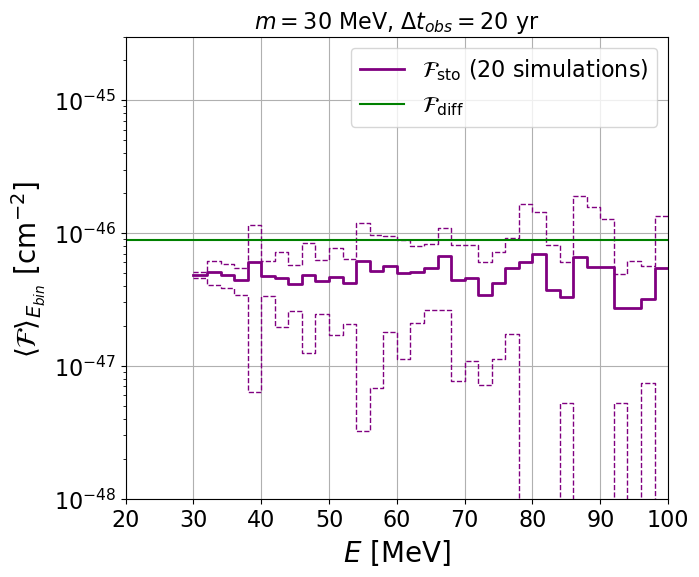

In [42]:
binwidth = 2
Ebins = np.arange(30, 100 + binwidth, binwidth)
# Ebins = np.arange(5, 100 + binwidth, binwidth)
bin_centers = 0.5 * (Ebins[:-1] + Ebins[1:])

mean_flux, std_flux, all_flux = SNdist.factorALLsimBINS(maTEST, ExpTIME, SN_sim, Ebins)


# TO PLOT AS BINNED DATA

Ebins_edges = np.repeat(Ebins, 2)[1:-1]

   
# plot mean
means_int_edges = np.repeat(mean_flux, 2)
std_devs_int_edges = np.repeat(std_flux, 2)

plt.figure(figsize=(7, 6))

plt.plot(Ebins_edges, means_int_edges/binwidth, color='purple', linewidth=2, label=r'$\mathcal{F}_{\rm sto}$ (20 simulations)')
plt.plot(Ebins_edges, (means_int_edges + std_devs_int_edges)/binwidth, color='purple', linestyle='--', linewidth=1)
plt.plot(Ebins_edges, (means_int_edges - std_devs_int_edges)/binwidth, color='purple', linestyle='--', linewidth=1)

plt.axhline(y=fluence_diff, color='green', linestyle='-', label=r"$\mathcal{F}_{\rm diff}$")

# plt.xlim([0,85])
plt.xlim([20,100])
plt.ylim([1e-48,3e-45])
plt.yscale('log')
plt.xlabel(r"$E$ [MeV]", fontsize=20)
plt.ylabel(r"$\langle \mathcal{F} \rangle_{E_{bin}}$ [$\mathrm{cm^{-2}}$] ", fontsize=20)
plt.title(r"$m=30$ MeV, $\Delta t_{obs}=20$ yr", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, loc='upper right')

plt.grid(True)
# plt.tight_layout()

plt.savefig("figures/sto2.pdf", bbox_inches='tight')
plt.show()

## How many simulations are needed?

This takes some time, already saved, load below

In [ ]:
# how many simulations do I need to get an stable (average) fluence?

# number of simulations
num_ITER_test = [20, 30, 50, 100, 200]

# exposure time
ExpTIME_ITER = [2, 5, 10, 20] # yr

# masses
m_aux = np.logspace(-1,2,20)


# to be saved
median_list  = []
plus_list  = []
minus_list = []


# loop over the number of simulations
for idx_old, num_ITER_fix in enumerate(num_ITER_test):
    print('\nWorking on num_ITER_fix = ', num_ITER_fix)

    # simulate
    SN_numbers, SN_sim = SNdist.SNsimulation(num_ITER = num_ITER_fix, time_low = -2.8e13, time_up = 0)

    # bin width
    binwidth = 2

    # loop over the exposure time
    for idx, ExpTIME_fix in enumerate(ExpTIME_ITER):

        print('Working on ExpTIME_fix = ', ExpTIME_fix)

        # Time window of the experiment, in seconds
        ExpTIME = ExpTIME_fix * Units.seconds_in_year  

        sto_median_ITER = []
        sto_plus_ITER = []
        sto_minus_ITER = []

        # loop over the mass
        for m_itt in m_aux:
            Ebins = np.arange(m_itt+(binwidth/2), 150 + binwidth, binwidth)
            bin_centers = 0.5 * (Ebins[:-1] + Ebins[1:])

            # take the median (of all simulations) fluence per bin
            median_flux, p16, p84, all_flux = SNdist.factorALLsimBINS_percentile(m_itt, ExpTIME, SN_sim, Ebins)



            # all_flux.shape -> (Nsim, Nbins)
            all_flux = all_flux / (binwidth * ExpTIME)  # [cm^-2 s^-1 MeV^-1]


            # Mean flux (energy mean) PER simulation
            flux_per_sim = np.mean(all_flux, axis=1)  # shape (Nsim,)
            
            # Median and Percentiles over all realizations
            flux_med = np.median(flux_per_sim)
            flux_p16 = np.percentile(flux_per_sim, 16)
            flux_p84 = np.percentile(flux_per_sim, 84)
            
            sto_median_ITER.append(flux_med)
            sto_minus_ITER.append(flux_p16)
            sto_plus_ITER.append(flux_p84)



        median_list.append(sto_median_ITER)
        plus_list.append(sto_plus_ITER)
        minus_list.append(sto_minus_ITER)





########
# SAVE #
########

save_file = 'data/stochastic_num_ITER_all.txt'

# convert to list
m_aux_ready = m_aux.tolist() if isinstance(m_aux, np.ndarray) else m_aux

# dictionary
lists = [
    num_ITER_test,
    ExpTIME_ITER,
    m_aux_ready,
    median_list,
    plus_list,
    minus_list
]

with open(save_file, 'w') as f:
    # Header
    f.write("ITER\tExpTIME\tm_aux\tMedian\tPlus\tMinus\n")

    # Save
    for list_it in lists:
        # save each list
        f.write(str(list_it) + "\n")

print(f"File saved in: {save_file}")

#### Load

In [19]:
########
# LOAD #
########

# where the data is stored
save_file = 'data/stochastic_num_ITER_all.txt'

with open(save_file, 'r') as f:
    lines = f.readlines()

# saved variables
num_ITER_test = ast.literal_eval(lines[1].strip())
ExpTIME_ITER  = ast.literal_eval(lines[2].strip())
m_aux         = np.array(ast.literal_eval(lines[3].strip())) # back to array
median_list   = eval(lines[4])#ast.literal_eval(lines[4].strip())
plus_list     = eval(lines[5])#ast.literal_eval(lines[5].strip())
minus_list    = eval(lines[6])#ast.literal_eval(lines[6].strip())

print("Data loaded")

Data loaded


#### Plot

Fix the exposure time

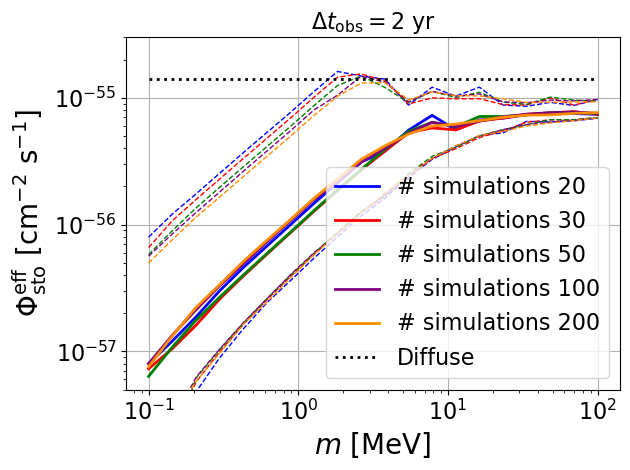

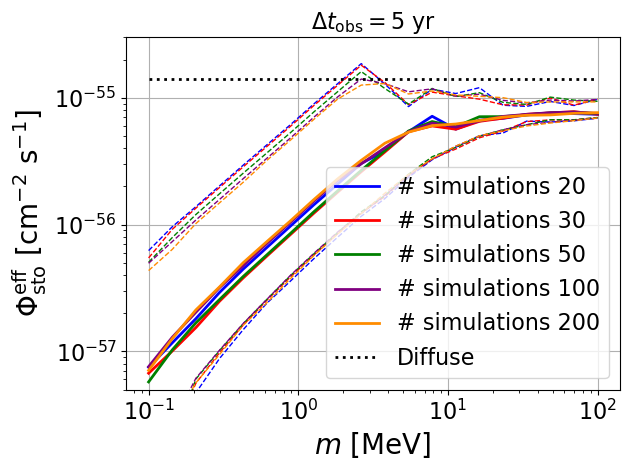

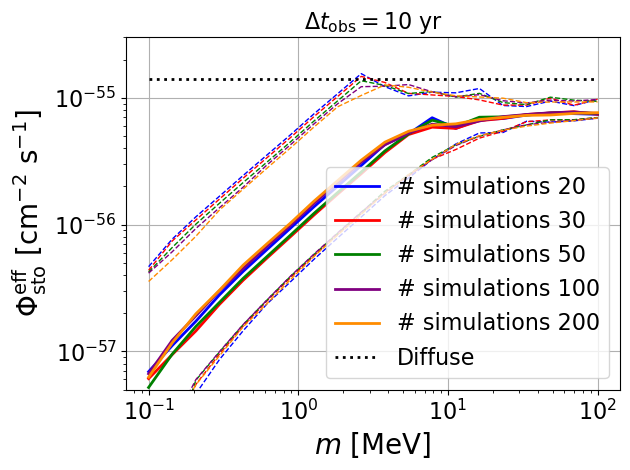

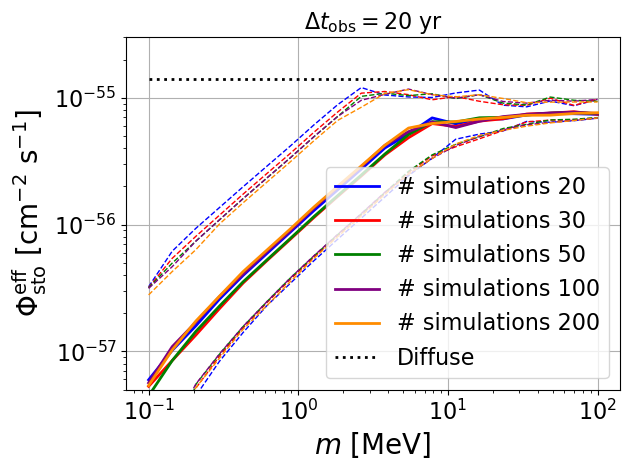

In [20]:
palet_col = ["blue", "red", "green", "purple", "darkorange"]


num_exp = len(ExpTIME_ITER)

# for t_exposure = 2 yrs
id_exp = 0

for idx, num_ITER_fix in enumerate(num_ITER_test):

    plt.plot(m_aux, median_list[num_exp*idx + id_exp], color=palet_col[idx], linewidth=2, label=fr'# simulations {num_ITER_fix}')
    plt.plot(m_aux, plus_list[num_exp*idx + id_exp], color=palet_col[idx], linestyle='--', linewidth=1)
    plt.plot(m_aux, minus_list[num_exp*idx + id_exp], color=palet_col[idx], linestyle='--', linewidth=1)

diff_list = (diffSNfactor)*np.ones(len(m_aux))
plt.plot(m_aux, diff_list, color='black', linestyle=':', linewidth=2, label='Diffuse')

# plt.xlim([0,85])
# plt.xlim([1,100])
plt.ylim([5e-58,3e-55])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$m$ [MeV]", fontsize=20)
plt.ylabel(r"$\Phi_{\rm sto}^{\rm eff}$ [cm$^{-2}$ s$^{-1}$]", fontsize=20)
plt.title(r"$\Delta t_{\rm obs}=2$ yr", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, loc='lower right')

plt.grid(True)
plt.tight_layout()
# plt.savefig("figures/exposure0.pdf", bbox_inches='tight')
plt.show()




# for t_exposure = 5 yrs
id_exp = 1

for idx, num_ITER_fix in enumerate(num_ITER_test):

    plt.plot(m_aux, median_list[num_exp*idx + id_exp], color=palet_col[idx], linewidth=2, label=fr'# simulations {num_ITER_fix}')
    plt.plot(m_aux, plus_list[num_exp*idx + id_exp], color=palet_col[idx], linestyle='--', linewidth=1)
    plt.plot(m_aux, minus_list[num_exp*idx + id_exp], color=palet_col[idx], linestyle='--', linewidth=1)

diff_list = (diffSNfactor)*np.ones(len(m_aux))
plt.plot(m_aux, diff_list, color='black', linestyle=':', linewidth=2, label='Diffuse')

# plt.xlim([0,85])
# plt.xlim([1,100])
plt.ylim([5e-58,3e-55])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$m$ [MeV]", fontsize=20)
plt.ylabel(r"$\Phi_{\rm sto}^{\rm eff}$ [cm$^{-2}$ s$^{-1}$]", fontsize=20)
plt.title(r"$\Delta t_{\rm obs}=5$ yr", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, loc='lower right')

plt.grid(True)
plt.tight_layout()
# plt.savefig("figures/exposure1.pdf", bbox_inches='tight')
plt.show()




# for t_exposure = 10 yrs
id_exp = 2

for idx, num_ITER_fix in enumerate(num_ITER_test):

    plt.plot(m_aux, median_list[num_exp*idx + id_exp], color=palet_col[idx], linewidth=2, label=fr'# simulations {num_ITER_fix}')
    plt.plot(m_aux, plus_list[num_exp*idx + id_exp], color=palet_col[idx], linestyle='--', linewidth=1)
    plt.plot(m_aux, minus_list[num_exp*idx + id_exp], color=palet_col[idx], linestyle='--', linewidth=1)

diff_list = (diffSNfactor)*np.ones(len(m_aux))
plt.plot(m_aux, diff_list, color='black', linestyle=':', linewidth=2, label='Diffuse')

# plt.xlim([0,85])
# plt.xlim([1,100])
plt.ylim([5e-58,3e-55])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$m$ [MeV]", fontsize=20)
plt.ylabel(r"$\Phi_{\rm sto}^{\rm eff}$ [cm$^{-2}$ s$^{-1}$]", fontsize=20)
plt.title(r"$\Delta t_{\rm obs}=10$ yr", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, loc='lower right')

plt.grid(True)
plt.tight_layout()
# plt.savefig("figures/exposure2.pdf", bbox_inches='tight')
plt.show()




# for t_exposure = 20 yrs
id_exp = 3

for idx, num_ITER_fix in enumerate(num_ITER_test):

    plt.plot(m_aux, median_list[num_exp*idx + id_exp], color=palet_col[idx], linewidth=2, label=fr'# simulations {num_ITER_fix}')
    plt.plot(m_aux, plus_list[num_exp*idx + id_exp], color=palet_col[idx], linestyle='--', linewidth=1)
    plt.plot(m_aux, minus_list[num_exp*idx + id_exp], color=palet_col[idx], linestyle='--', linewidth=1)

diff_list = (diffSNfactor)*np.ones(len(m_aux))
plt.plot(m_aux, diff_list, color='black', linestyle=':', linewidth=2, label='Diffuse')

# plt.xlim([0,85])
# plt.xlim([1,100])
plt.ylim([5e-58,3e-55])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$m$ [MeV]", fontsize=20)
plt.ylabel(r"$\Phi_{\rm sto}^{\rm eff}$ [cm$^{-2}$ s$^{-1}$]", fontsize=20)
plt.title(r"$\Delta t_{\rm obs}=20$ yr", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, loc='lower right')

plt.grid(True)
plt.tight_layout()
# plt.savefig("figures/exposure3.pdf", bbox_inches='tight')
plt.show()

Fix the number of simulations

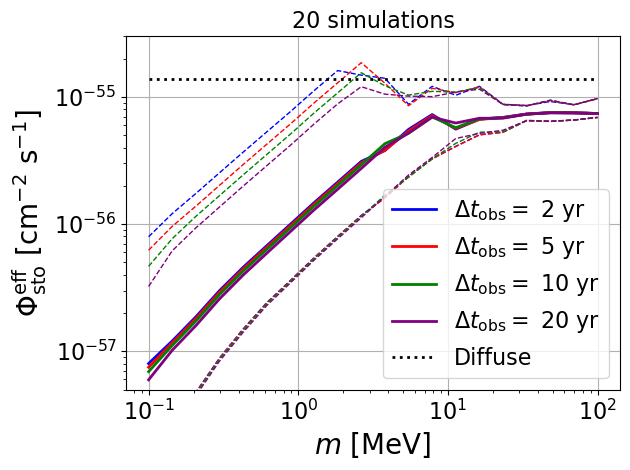

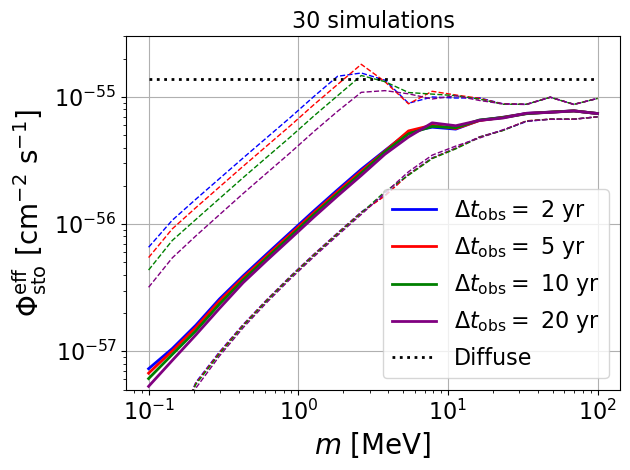

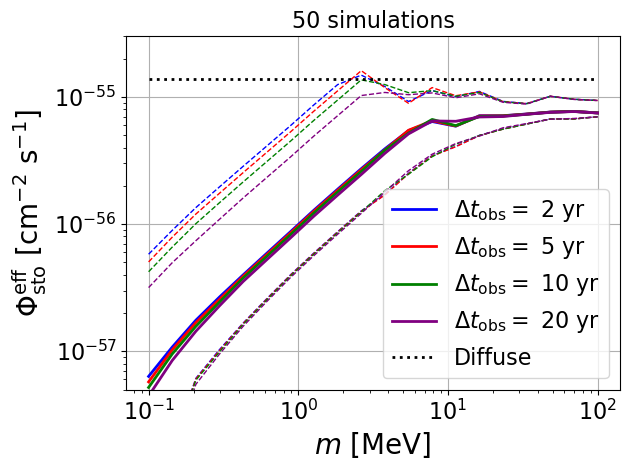

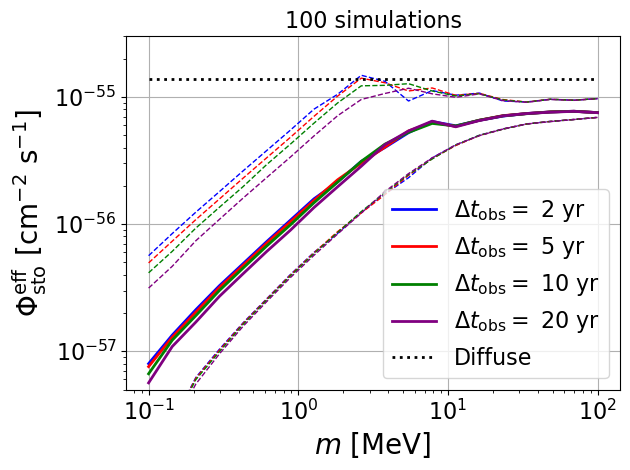

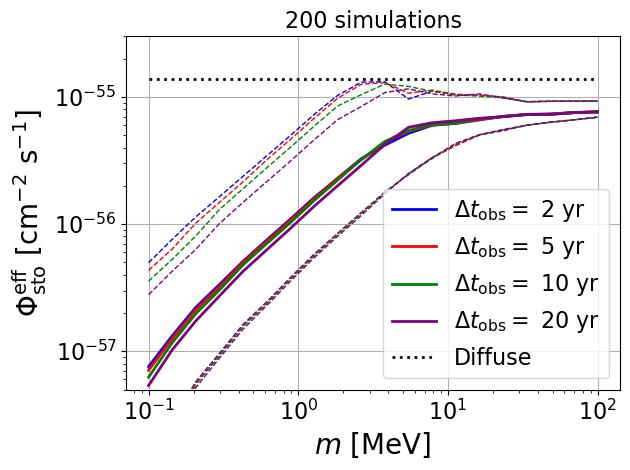

In [21]:

# for num_simulations = 20
id_sims = 0

for idx_exp, ExpTIME_fix in enumerate(ExpTIME_ITER):

    plt.plot(m_aux, median_list[num_exp*id_sims + idx_exp], color=palet_col[idx_exp], linewidth=2, label=fr'$\Delta t_{{\rm obs}}=$ {ExpTIME_fix} yr')
    plt.plot(m_aux, plus_list[num_exp*id_sims + idx_exp], color=palet_col[idx_exp], linestyle='--', linewidth=1)
    plt.plot(m_aux, minus_list[num_exp*id_sims + idx_exp], color=palet_col[idx_exp], linestyle='--', linewidth=1)

diff_list = (diffSNfactor)*np.ones(len(m_aux))
plt.plot(m_aux, diff_list, color='black', linestyle=':', linewidth=2, label='Diffuse')

# plt.xlim([0,85])
# plt.xlim([1,100])
plt.ylim([5e-58,3e-55])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$m$ [MeV]", fontsize=20)
plt.ylabel(r"$\Phi_{\rm sto}^{\rm eff}$ [cm$^{-2}$ s$^{-1}$]", fontsize=20)
plt.title(r"20 simulations", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, loc='lower right')

plt.grid(True)
plt.tight_layout()
# plt.savefig("figures/numsims0.pdf", bbox_inches='tight')
plt.show()


# for num_simulations = 30
id_sims = 1

for idx_exp, ExpTIME_fix in enumerate(ExpTIME_ITER):

    plt.plot(m_aux, median_list[num_exp*id_sims + idx_exp], color=palet_col[idx_exp], linewidth=2, label=fr'$\Delta t_{{\rm obs}}=$ {ExpTIME_fix} yr')
    plt.plot(m_aux, plus_list[num_exp*id_sims + idx_exp], color=palet_col[idx_exp], linestyle='--', linewidth=1)
    plt.plot(m_aux, minus_list[num_exp*id_sims + idx_exp], color=palet_col[idx_exp], linestyle='--', linewidth=1)

diff_list = (diffSNfactor)*np.ones(len(m_aux))
plt.plot(m_aux, diff_list, color='black', linestyle=':', linewidth=2, label='Diffuse')

# plt.xlim([0,85])
# plt.xlim([1,100])
plt.ylim([5e-58,3e-55])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$m$ [MeV]", fontsize=20)
plt.ylabel(r"$\Phi_{\rm sto}^{\rm eff}$ [cm$^{-2}$ s$^{-1}$]", fontsize=20)
plt.title(r"30 simulations", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, loc='lower right')

plt.grid(True)
plt.tight_layout()
# plt.savefig("figures/numsims1.pdf", bbox_inches='tight')
plt.show()


# for num_simulations = 50
id_sims = 2

for idx_exp, ExpTIME_fix in enumerate(ExpTIME_ITER):

    plt.plot(m_aux, median_list[num_exp*id_sims + idx_exp], color=palet_col[idx_exp], linewidth=2, label=fr'$\Delta t_{{\rm obs}}=$ {ExpTIME_fix} yr')
    plt.plot(m_aux, plus_list[num_exp*id_sims + idx_exp], color=palet_col[idx_exp], linestyle='--', linewidth=1)
    plt.plot(m_aux, minus_list[num_exp*id_sims + idx_exp], color=palet_col[idx_exp], linestyle='--', linewidth=1)

diff_list = (diffSNfactor)*np.ones(len(m_aux))
plt.plot(m_aux, diff_list, color='black', linestyle=':', linewidth=2, label='Diffuse')

# plt.xlim([0,85])
# plt.xlim([1,100])
plt.ylim([5e-58,3e-55])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$m$ [MeV]", fontsize=20)
plt.ylabel(r"$\Phi_{\rm sto}^{\rm eff}$ [cm$^{-2}$ s$^{-1}$]", fontsize=20)
plt.title(r"50 simulations", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, loc='lower right')

plt.grid(True)
plt.tight_layout()
# plt.savefig("figures/numsims2.pdf", bbox_inches='tight')
plt.show()


# for num_simulations = 100
id_sims = 3

for idx_exp, ExpTIME_fix in enumerate(ExpTIME_ITER):

    plt.plot(m_aux, median_list[num_exp*id_sims + idx_exp], color=palet_col[idx_exp], linewidth=2, label=fr'$\Delta t_{{\rm obs}}=$ {ExpTIME_fix} yr')
    plt.plot(m_aux, plus_list[num_exp*id_sims + idx_exp], color=palet_col[idx_exp], linestyle='--', linewidth=1)
    plt.plot(m_aux, minus_list[num_exp*id_sims + idx_exp], color=palet_col[idx_exp], linestyle='--', linewidth=1)

diff_list = (diffSNfactor)*np.ones(len(m_aux))
plt.plot(m_aux, diff_list, color='black', linestyle=':', linewidth=2, label='Diffuse')

# plt.xlim([0,85])
# plt.xlim([1,100])
plt.ylim([5e-58,3e-55])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$m$ [MeV]", fontsize=20)
plt.ylabel(r"$\Phi_{\rm sto}^{\rm eff}$ [cm$^{-2}$ s$^{-1}$]", fontsize=20)
plt.title(r"100 simulations", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, loc='lower right')

plt.grid(True)
plt.tight_layout()
# plt.savefig("figures/numsims3.pdf", bbox_inches='tight')
plt.show()


# for num_simulations = 200
id_sims = 4

for idx_exp, ExpTIME_fix in enumerate(ExpTIME_ITER):

    plt.plot(m_aux, median_list[num_exp*id_sims + idx_exp], color=palet_col[idx_exp], linewidth=2, label=fr'$\Delta t_{{\rm obs}}=$ {ExpTIME_fix} yr')
    plt.plot(m_aux, plus_list[num_exp*id_sims + idx_exp], color=palet_col[idx_exp], linestyle='--', linewidth=1)
    plt.plot(m_aux, minus_list[num_exp*id_sims + idx_exp], color=palet_col[idx_exp], linestyle='--', linewidth=1)

diff_list = (diffSNfactor)*np.ones(len(m_aux))
plt.plot(m_aux, diff_list, color='black', linestyle=':', linewidth=2, label='Diffuse')

# plt.xlim([0,85])
# plt.xlim([1,100])
plt.ylim([5e-58,3e-55])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$m$ [MeV]", fontsize=20)
plt.ylabel(r"$\Phi_{\rm sto}^{\rm eff}$ [cm$^{-2}$ s$^{-1}$]", fontsize=20)
plt.title(r"200 simulations", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, loc='lower right')

plt.grid(True)
plt.tight_layout()
# plt.savefig("figures/numsims4.pdf", bbox_inches='tight')
plt.show()

Plot a mix

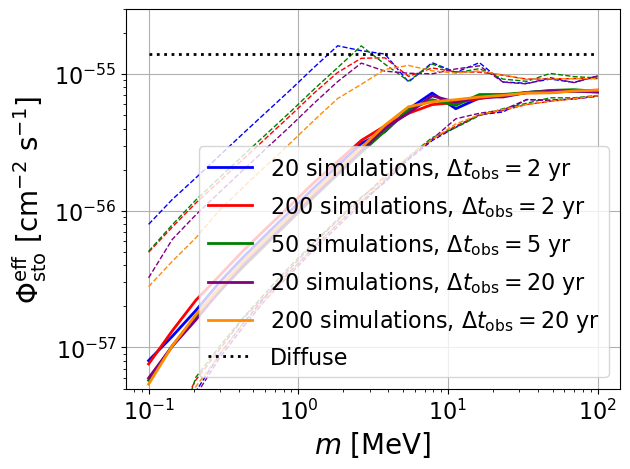

In [22]:

id_sims = 0 # for num_simulations = 20
idx_exp = 0 # for exposure time = 2 yr
plt.plot(m_aux, median_list[num_exp*id_sims + idx_exp], color=palet_col[0], linewidth=2, label=fr'20 simulations, $\Delta t_{{\rm obs}}=2$ yr')
plt.plot(m_aux, plus_list[num_exp*id_sims + idx_exp], color=palet_col[0], linestyle='--', linewidth=1)
plt.plot(m_aux, minus_list[num_exp*id_sims + idx_exp], color=palet_col[0], linestyle='--', linewidth=1)

id_sims = 4 # for num_simulations = 200
idx_exp = 0 # for exposure time = 2 yr
plt.plot(m_aux, median_list[num_exp*id_sims + idx_exp], color=palet_col[1], linewidth=2, label=fr'200 simulations, $\Delta t_{{\rm obs}}=2$ yr')
plt.plot(m_aux, plus_list[num_exp*id_sims + idx_exp], color=palet_col[1], linestyle='--', linewidth=1)
plt.plot(m_aux, minus_list[num_exp*id_sims + idx_exp], color=palet_col[1], linestyle='--', linewidth=1)

id_sims = 2 # for num_simulations = 50
idx_exp = 1 # for exposure time = 5 yr
plt.plot(m_aux, median_list[num_exp*id_sims + idx_exp], color=palet_col[2], linewidth=2, label=fr'50 simulations, $\Delta t_{{\rm obs}}=5$ yr')
plt.plot(m_aux, plus_list[num_exp*id_sims + idx_exp], color=palet_col[2], linestyle='--', linewidth=1)
plt.plot(m_aux, minus_list[num_exp*id_sims + idx_exp], color=palet_col[2], linestyle='--', linewidth=1)

id_sims = 0 # for num_simulations = 20
idx_exp = 3 # for exposure time = 20 yr
plt.plot(m_aux, median_list[num_exp*id_sims + idx_exp], color=palet_col[3], linewidth=2, label=fr'20 simulations, $\Delta t_{{\rm obs}}=20$ yr')
plt.plot(m_aux, plus_list[num_exp*id_sims + idx_exp], color=palet_col[3], linestyle='--', linewidth=1)
plt.plot(m_aux, minus_list[num_exp*id_sims + idx_exp], color=palet_col[3], linestyle='--', linewidth=1)

id_sims = 4 # for num_simulations = 200
idx_exp = 3 # for exposure time = 20 yr
plt.plot(m_aux, median_list[num_exp*id_sims + idx_exp], color=palet_col[4], linewidth=2, label=fr'200 simulations, $\Delta t_{{\rm obs}}=20$ yr')
plt.plot(m_aux, plus_list[num_exp*id_sims + idx_exp], color=palet_col[4], linestyle='--', linewidth=1)
plt.plot(m_aux, minus_list[num_exp*id_sims + idx_exp], color=palet_col[4], linestyle='--', linewidth=1)

diff_list = (diffSNfactor)*np.ones(len(m_aux))
plt.plot(m_aux, diff_list, color='black', linestyle=':', linewidth=2, label='Diffuse')

# plt.xlim([0,85])
# plt.xlim([1,100])
plt.ylim([5e-58,3e-55])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$m$ [MeV]", fontsize=20)
plt.ylabel(r"$\Phi_{\rm sto}^{\rm eff}$ [cm$^{-2}$ s$^{-1}$]", fontsize=20)
# plt.title(r"200 simulations", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, loc='lower right')

plt.grid(True)
plt.tight_layout()
# plt.savefig("figures/MIX.pdf", bbox_inches='tight')
plt.show()